# End-to-End Multi-Class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using tensorflow 2.0 and tensorflow hub.

## 1. Problem

Identifying the breed of the dog given the image of a dog

## 2. Data

Data is obtained from kaggle dog breed identification competition

## 3. Evaluation

The evaluation is with a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Some information about the data :-
* we are dealing with images (unstructured data) so its better to use deep learning/transfer learning
* There are 120 breeds of dogs (120 different classes)
* There are 10000+ images in the training set (these images have labels)
* There are 10000+ images in the test set (these images have no labels, we are trying to predict the labels.)

In [118]:
# command to unzip the data into google drive.
#!unzip "/content/drive/MyDrive/Colab/dog-breed-identification.zip" -d "/content/drive/MyDrive/Colab/dog-vision"

### Getting our Workspace Ready
* import tensorflow.
* import tensorflow hub.
* Make sure we're using a GPU.

In [119]:
# Import tensorflow into colab
import tensorflow as tf
print("Tenserflow version : ", tf.__version__)

Tenserflow version :  2.15.0


In [120]:
import tensorflow_hub as hub
print("TF hub version : ", hub.__version__)

TF hub version :  0.16.1


In [121]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


## Getting our Data Ready (Turning our images into Tensors)

Turning out images into tensors (numerical representation).



In [122]:
import pandas as pd
labels_csv = pd.read_csv("./drive/MyDrive/Colab/dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [123]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

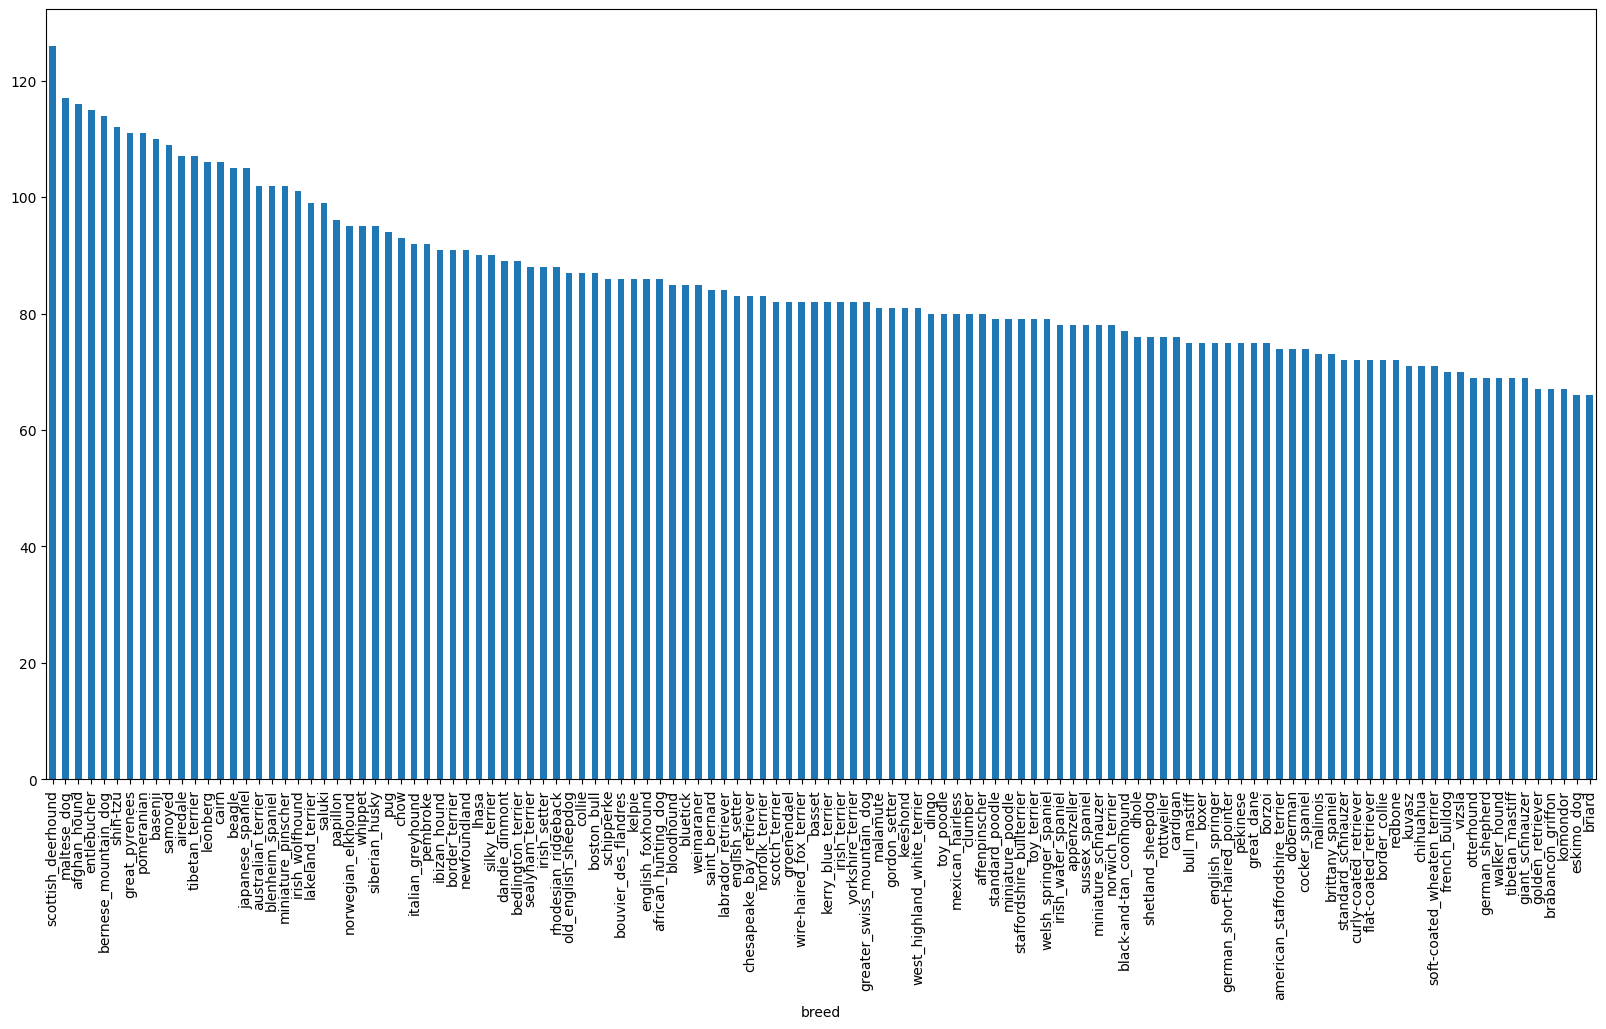

In [124]:
# how many images are there of each breed

labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [125]:
labels_csv["breed"].value_counts().median()

82.0

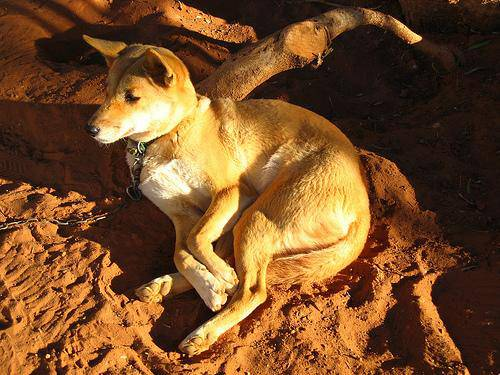

In [126]:
from IPython.display import Image

Image("./drive/MyDrive/Colab/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

In [127]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [128]:
filenames = ["./drive/MyDrive/Colab/dog-vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['./drive/MyDrive/Colab/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './drive/MyDrive/Colab/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './drive/MyDrive/Colab/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 './drive/MyDrive/Colab/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './drive/MyDrive/Colab/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './drive/MyDrive/Colab/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './drive/MyDrive/Colab/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './drive/MyDrive/Colab/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 './drive/MyDrive/Colab/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './drive/MyDrive/Colab/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [129]:
# check whether number of filenames matches number of actual image files
import os
if len(os.listdir("./drive/MyDrive/Colab/dog-vision/train")) == len(filenames):
  print("filenames match the actual amount of files.")
else:
  print("filenames does not match the actual amount of files.")

filenames match the actual amount of files.


In [130]:
import numpy as np

labels = labels_csv["breed"].to_numpy()

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [131]:
len(labels)

10222

In [132]:
# check for missing data

if len(labels) == len(filenames):
  print("NUmber of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames")

NUmber of labels matches number of filenames


In [133]:
# find the unique label values

unique_breeds = np.unique(labels)

unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [134]:
len(unique_breeds)

120

In [135]:
# Turn a single label into an array of booleans

print(labels[0])

labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [136]:
# turning every label into an array of booleans

boolean_labels = [label == unique_breeds for label in labels]

In [137]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [138]:
len(boolean_labels)

10222

In [139]:
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

Since the dataset doesn't come with a validation set, we are going to create one.

In [140]:
# Set up X and y
X = filenames
y = boolean_labels

We are going to start of experimenting with 1000 images and then increase as needed.

In [141]:
# set number of images to use

NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [142]:
# SPlitting data
from sklearn.model_selection import train_test_split

# splitting into training and validation

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [143]:
X_train[:5], y_train[:2]

(['./drive/MyDrive/Colab/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  './drive/MyDrive/Colab/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  './drive/MyDrive/Colab/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  './drive/MyDrive/Colab/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  './drive/MyDrive/Colab/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fa

## Preprocessing Images

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
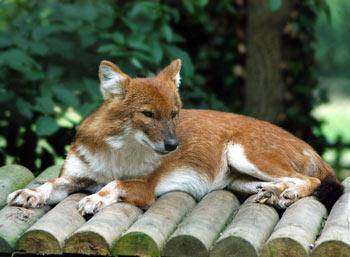

In [144]:
from matplotlib.pyplot import imread

image = imread(filenames[42])
image

In [145]:
image.shape

(257, 350, 3)

In [146]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [147]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [148]:
# making a function for preprocessing
IMG_SIZE = 224

def process_image(image_path, image_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # reading file
  image = tf.io.read_file(image_path)
  # converting to tensor
  image = tf.image.decode_jpeg(image, channels=3)
  # normalizing the values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # resize the image to our desired vale (224 x 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


## Turning our Data into Batches

Turning our data into batches is useful because using all images at once may cause memory issues

Therefore we are splitting the data into 32 (batch size) images at a time.

In order to use TensorFlow effectively, we need to convert our data into the form of tensor tuples which look like this :-
`(image, label)`.



In [149]:
def get_image_label(image_path, label):
  """
  Takes an image path with the associated label, processes the image and returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [150]:
(process_image(X[42]),y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [151]:
BATCH_SIZE = 32

def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it is training data but doesnt shuffle validation data.
  Also accepts test data as input (no labels).
  """

  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)

    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch

  else:
    print("Create training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch

In [152]:
#Creating training and validation batches

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Create training data batches...
Creating validation data batches...


In [153]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [154]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their label from a data batch.
  """
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [155]:
train_images, train_labels = next(train_data.as_numpy_iterator())

train_images, train_labels

(array([[[[6.36554658e-02, 2.44397782e-02, 1.65966395e-02],
          [6.76106438e-02, 2.83949543e-02, 2.05518175e-02],
          [7.16199800e-02, 3.24042924e-02, 2.45611556e-02],
          ...,
          [4.82842177e-01, 2.08942875e-01, 8.11866075e-02],
          [4.97329712e-01, 2.21963376e-01, 9.49406549e-02],
          [5.06556988e-01, 2.32765347e-01, 1.04955271e-01]],
 
         [[7.49044195e-02, 3.56887318e-02, 2.78455932e-02],
          [7.44726881e-02, 3.52569930e-02, 2.74138581e-02],
          [7.07755759e-02, 3.15598920e-02, 2.37167552e-02],
          ...,
          [5.03878176e-01, 2.17978328e-01, 9.24881250e-02],
          [5.14294267e-01, 2.28032976e-01, 1.02542773e-01],
          [4.93866324e-01, 2.07993045e-01, 8.25028419e-02]],
 
         [[6.72969222e-02, 2.80812383e-02, 2.02380996e-02],
          [6.73336536e-02, 2.81179715e-02, 2.02748328e-02],
          [7.30596185e-02, 3.38439271e-02, 2.60007922e-02],
          ...,
          [5.20651996e-01, 2.20529675e-01, 1.0174

In [156]:
len(train_images), len(train_labels)

(32, 32)

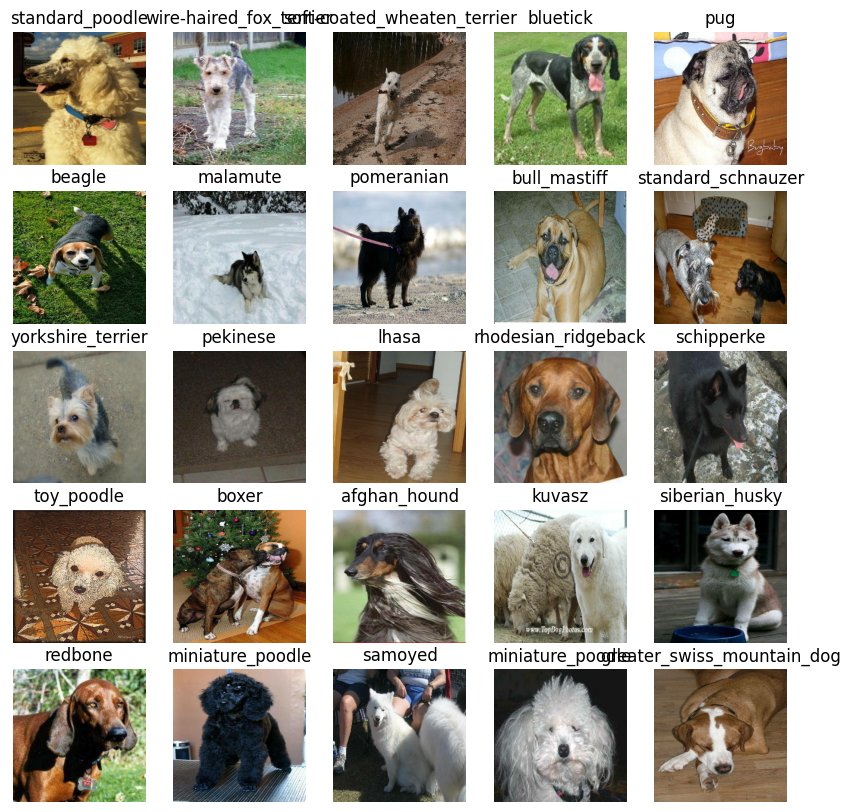

In [157]:
show_25_images(train_images, train_labels)

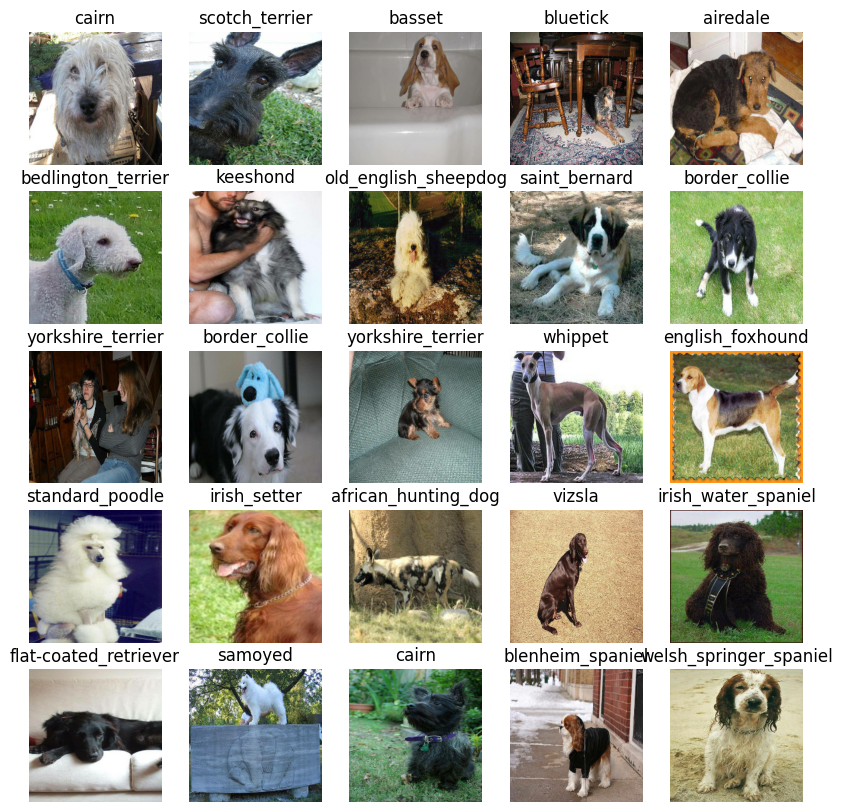

In [158]:
# visualising validation set

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

In [159]:
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE, 3]

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2"

Creating a function which :-
* Takes the input shape, output shape and model we've chosen as parameters.
* Defines the layers in a Keras Model in sequential fashion.
* Compiles the model (says how it should be evaluated and improved).
* Build the model (tells the model about the input shape it is going to get).
* Returns the model.

In [160]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with : ",MODEL_URL)

  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [161]:
model = create_model()
model.summary()

Building model with :  https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_4 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating Callbacks

callbacks are helper functions a model can use during training to do tasks such as saving its progress, check its progress and stop training early if model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training too long.

### TensorBoard Callback

To create a TensorBoard callback:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function
3. Visualise our models training logs with the `%tensorboard` magic function

In [162]:
# load TensorBoard Notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [163]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/Colab/dog-vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)


### Early Stopping Callback

This callback stops training when a monitored metric has stopped improving and prevents overfitting.

In [164]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience=3)

In [165]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


## Training a Model on a subset of data

Before this we will be defining a parameter `NUM_EPOCHS`

`NUM_EPOCHS` defines how many passes of the data we'd like our model to do. Each pass is equivalent to our model trying to find patterns in each dog image and see which pattern relates to the label.

In [166]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [167]:
def train_model():
  """
  Trains a given model and returns the trained version
  """

  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks=[tensorboard, early_stopping])

  return model

In [111]:
model = train_model()

Building model with :  https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Epoch 1/100
25/25 [==============================] - 133s 3s/step - loss: 4.5687 - accuracy: 0.0975 - val_loss: 3.4280 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 5s 184ms/step - loss: 1.6478 - accuracy: 0.6825 - val_loss: 2.1872 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 5s 180ms/step - loss: 0.5664 - accuracy: 0.9388 - val_loss: 1.6563 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 4s 156ms/step - loss: 0.2546 - accuracy: 0.9875 - val_loss: 1.4687 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 5s 203ms/step - loss: 0.1503 - accuracy: 0.9962 - val_loss: 1.3936 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 4s 164ms/step - loss: 0.1015 - accuracy: 1.0000 - val_loss: 1.3525 - val_accuracy: 0.6500
Ep

## Making and evaluating predictions using a trained model

In [112]:
preds = model.predict(val_data, verbose=1)
preds

7/7 [==============================] - 2s 147ms/step


array([[4.6998281e-03, 7.7791025e-05, 8.2006003e-04, ..., 5.8427546e-04,
        5.9842696e-05, 2.6178306e-03],
       [2.0325743e-03, 1.1023843e-03, 1.8010145e-02, ..., 4.9596152e-04,
        1.0501443e-03, 3.7718259e-04],
       [9.5992427e-06, 1.7689356e-04, 1.8631355e-04, ..., 1.1067764e-04,
        7.1761356e-06, 5.8198010e-04],
       ...,
       [1.4976503e-05, 7.8238900e-06, 2.6798717e-04, ..., 7.5039352e-05,
        6.2419538e-05, 2.4389006e-05],
       [3.9432663e-03, 3.7527000e-04, 2.4524084e-04, ..., 4.9995264e-04,
        4.8245172e-05, 6.4419438e-03],
       [3.6751156e-04, 3.2256539e-05, 1.9332691e-03, ..., 1.4451167e-03,
        1.0207933e-03, 2.0235461e-04]], dtype=float32)

array([[4.6998281e-03, 7.7791025e-05, 8.2006003e-04, ..., 5.8427546e-04,
        5.9842696e-05, 2.6178306e-03],
       [2.0325743e-03, 1.1023843e-03, 1.8010145e-02, ..., 4.9596152e-04,
        1.0501443e-03, 3.7718259e-04],
       [9.5992427e-06, 1.7689356e-04, 1.8631355e-04, ..., 1.1067764e-04,
        7.1761356e-06, 5.8198010e-04],
       ...,
       [1.4976503e-05, 7.8238900e-06, 2.6798717e-04, ..., 7.5039352e-05,
        6.2419538e-05, 2.4389006e-05],
       [3.9432663e-03, 3.7527000e-04, 2.4524084e-04, ..., 4.9995264e-04,
        4.8245172e-05, 6.4419438e-03],
       [3.6751156e-04, 3.2256539e-05, 1.9332691e-03, ..., 1.4451167e-03,
        1.0207933e-03, 2.0235461e-04]], dtype=float32)

### Analysing The First Prediction

In [ ]:
print(f"Max value (probability of prediction): {np.max(preds[0])}") # the max probability value predicted by the model
print(f"Max index: {np.argmax(preds[0])}") # the index of the max probability value predicted by the model
print(f"Predicted label: {unique_breeds[np.argmax(preds[0])]}")

In [114]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

### Visualising the Prediction

In [ ]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

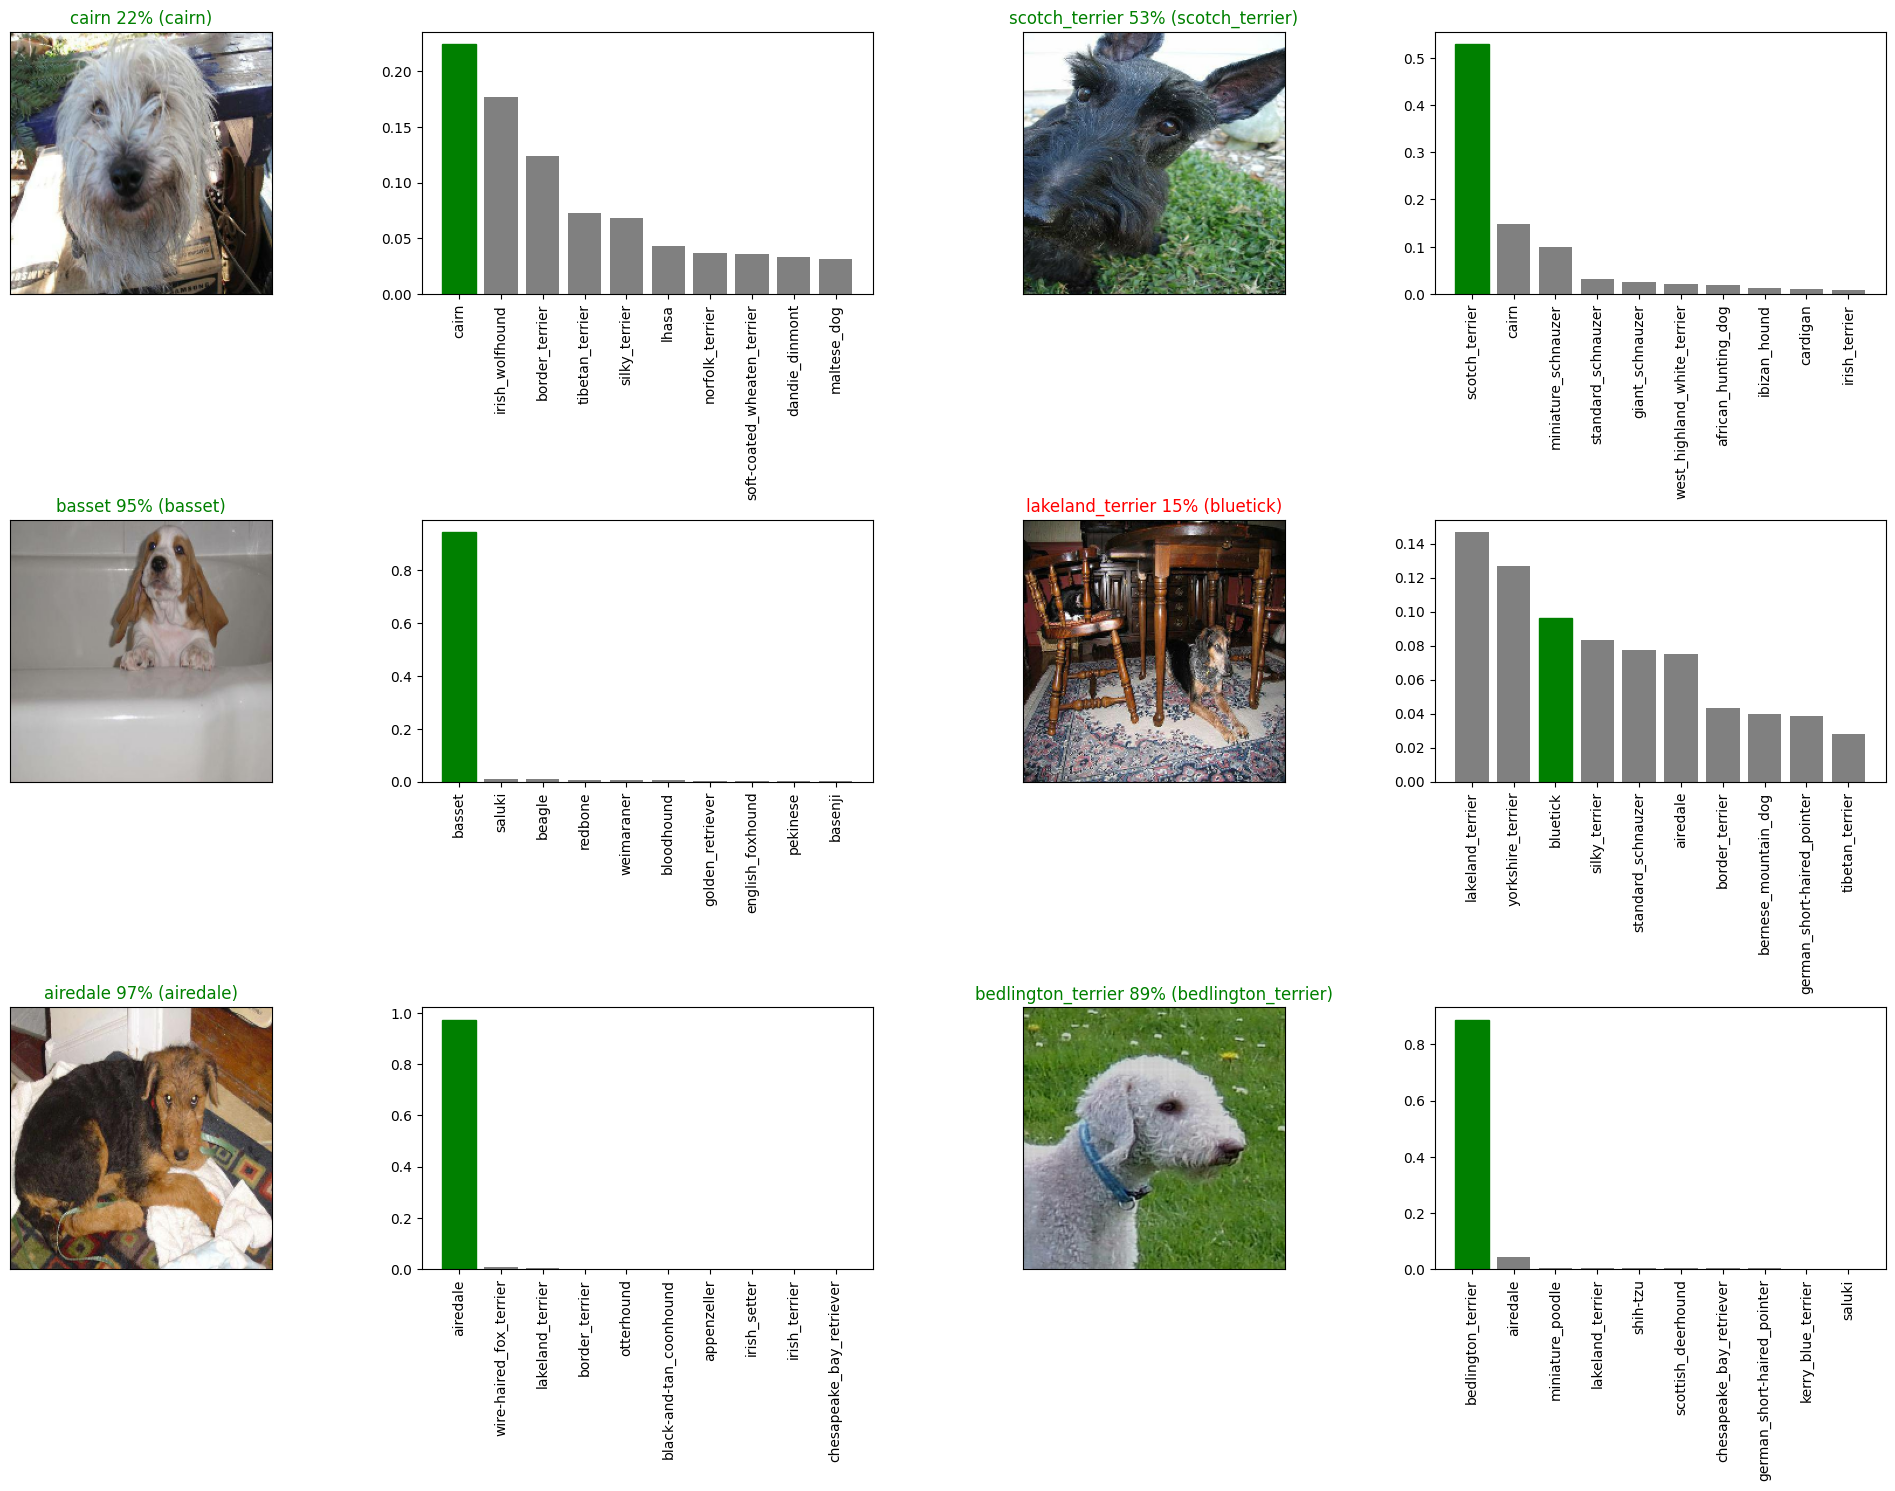

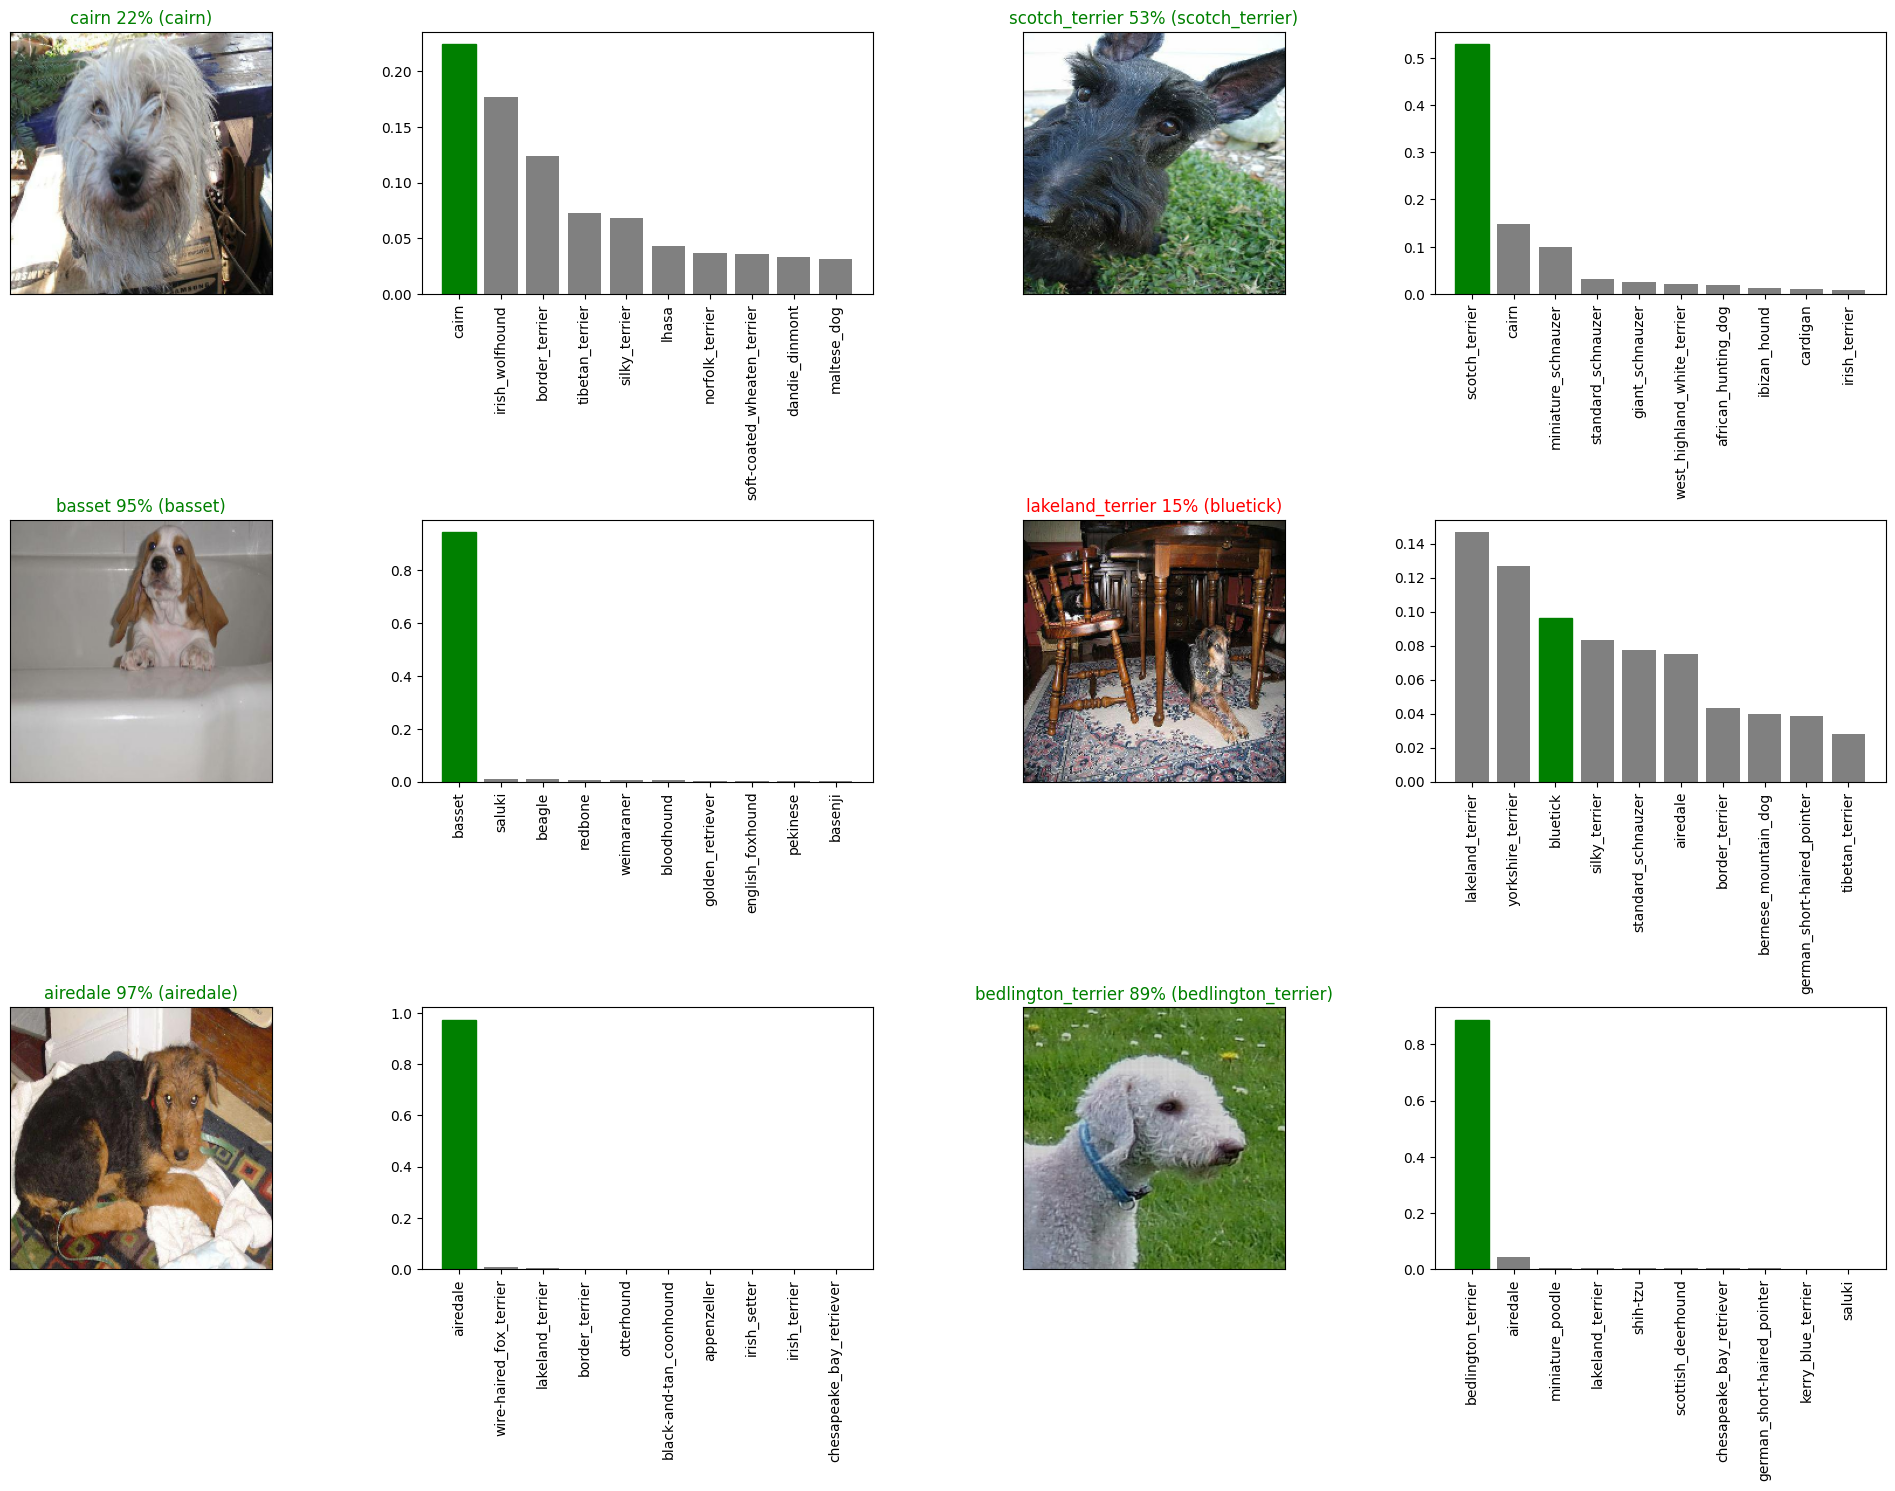

In [117]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=preds,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=preds,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()